# Documentación del Código

Este código realiza el tratamiento de datos, visualización de gráficos, y modelado utilizando bibliotecas como `numpy`, `pandas`, `matplotlib`, `seaborn`, `sklearn` y `multiprocessing`.

## Importación de Bibliotecas

Se importan las bibliotecas necesarias para el procesamiento y análisis de datos:
- `numpy`
- `pandas` 
- `matplotlib`
- `seaborn` 
- `sklearn`
- `multiprocessing`

`%matplotlib inline` : Descomentar esta línea solo en Jupyter en vscode da error



In [5]:
# Tratamiento de datos
# ==============================================================================
import numpy as np  # Biblioteca para operaciones numéricas y matrices
import pandas as pd  # Biblioteca para manipulación de datos estructurados (DataFrames)

# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor  # Red neuronal para regresión
from sklearn.compose import ColumnTransformer  # Herramienta para aplicar transformaciones a columnas específicas
from sklearn.preprocessing import OneHotEncoder  # Codificador OneHot para variables categóricas
from sklearn.preprocessing import StandardScaler  # Escalador estándar para normalizar datos
from sklearn.compose import make_column_selector  # Selección de columnas para aplicar transformaciones
from sklearn.pipeline import Pipeline  # Herramienta para encadenar pasos de preprocesamiento y modelado
from sklearn.metrics import mean_squared_error  # Métrica de error cuadrático medio (MSE)
from sklearn.model_selection import RandomizedSearchCV  # Búsqueda aleatoria de parámetros
from sklearn.model_selection import KFold  # Validación cruzada con K pliegues
from sklearn import set_config  # Configuración para mostrar la representación de la tubería
import multiprocessing  # Módulo para trabajar con múltiples procesos

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt  # Biblioteca para crear gráficos estáticos
import seaborn as sns  # Biblioteca para gráficos estadísticos basados en matplotlib
#%matplotlib inline  # Activar la visualización de gráficos en el notebook (solo en Jupyter)
plt.style.use('fivethirtyeight')  # Aplicar el estilo 'fivethirtyeight' para los gráficos


# Configuración warnings
# ==============================================================================
import warnings  # Módulo para manejar advertencias
warnings.filterwarnings('ignore')  # Ignorar todas las advertencias

ModuleNotFoundError: No module named 'pandas'

# Descarga y Preparación de Datos

Este bloque de código descarga un conjunto de datos desde una URL y luego realiza una modificación en los nombres de las columnas para hacerlas más descriptivas. A continuación se explica el proceso.

## Descarga de Datos

Se descarga el archivo CSV desde una URL específica utilizando `pandas`. El archivo contiene datos sobre casas en Saratoga y es leído directamente desde un repositorio de GitHub.

In [ ]:
# Descarga de datos
# ==============================================================================
# URL donde se encuentra el archivo CSV
url = ("https://raw.githubusercontent.com/JoaquinAmatRodrigo/"
       "Estadistica-machine-learning-python/master/data/SaratogaHouses.csv")  

# Descargar el archivo CSV y cargarlo en un DataFrame de pandas
datos = pd.read_csv(url, sep=",")  

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

# Documentación de Exploración Descriptiva de Datos

Antes de entrenar un modelo predictivo o realizar cualquier análisis con un nuevo conjunto de datos, es crucial realizar una **exploración descriptiva**. Este proceso nos ayuda a entender mejor las variables que componen el conjunto de datos y a detectar posibles errores que puedan afectar el análisis posterior.

## Propósitos de la Exploración Descriptiva

1. **Verificación de tipos de datos**: Es importante asegurarse de que cada variable tenga el tipo de dato adecuado, por ejemplo, que una variable numérica no esté almacenada como texto (y viceversa).
2. **Detección de valores erróneos o inconsistentes**:
   - Valores que no tienen sentido, como un precio de vivienda igual a 0 o espacios en blanco cuando deberían estar presentes valores numéricos.
   - Errores de formato, como palabras o caracteres no numéricos en columnas que deberían ser numéricas.
3. **Selección de predictores adecuados**: Identificar las variables que serán útiles para el modelo predictivo basado en su tipo y relación con otras variables.

## Tipo de Cada Columna

Este bloque de código muestra información detallada sobre el tipo de cada columna en el conjunto de datos. Específicamente, el método `info()` de `pandas` se utiliza para obtener un resumen de las columnas y sus tipos de datos.

## Información sobre el Tipo de Cada Columna

Se utiliza el método `info()` para mostrar información sobre el DataFrame, como el número total de entradas, el tipo de datos de cada columna, y cuántos valores no nulos existen en cada columna.

A continuación veremos que todas las columnas tienen el tipo de dato correcto.

In [ ]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

# Análisis de Datos Ausentes

Este bloque de código calcula el número de valores ausentes (nulos) para cada variable en el conjunto de datos y los ordena de menor a mayor cantidad de datos ausentes.

## Cálculo de los Valores Ausentes

Se utiliza el método `isna()` de `pandas` para identificar los valores nulos en el `DataFrame`, seguido de `sum()` para contar cuántos valores nulos tiene cada columna. Luego, se ordenan los resultados de menor a mayor utilizando `sort_values()`.

A continuación veremos que todas las columnas están completas, no hay valores ausentes.

In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

# Distribución de la Variable Respuesta

Este bloque de código visualiza la distribución de la variable respuesta `precio` utilizando un histograma con una curva de densidad (KDE). La visualización ayuda a entender cómo se distribuyen los valores de la variable `precio` en el conjunto de datos.

## Visualización de la Distribución de la Variable `precio`

Se utiliza `seaborn` para crear un histograma junto con una curva de densidad (KDE) sobre la variable `precio`.


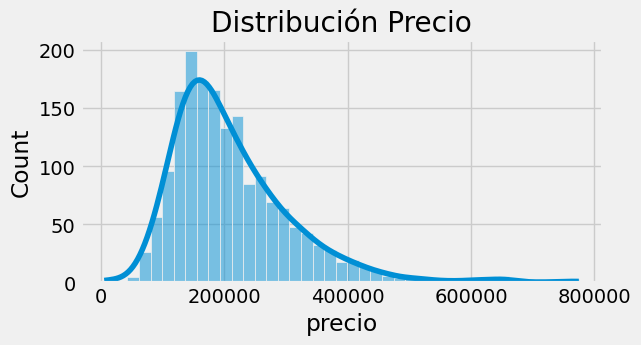

In [ ]:
# Distribución variable respuesta
# ==============================================================================
# Crear figura y ejes para el gráfico
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3)) 

# Crear el histograma con KDE 
sns.histplot(data=datos, x='precio', kde=True, ax=ax) 
 
# Título del gráfico
ax.set_title("Distribución Precio")  

# Etiqueta del eje X
ax.set_xlabel('precio');  

# Análisis de Distribución de Variables Numéricas

En el caso de los modelos de redes neuronales, es importante destacar que no son modelos paramétricos. Esto significa que **no asumen ninguna distribución específica** para la variable respuesta. Por lo tanto, no es necesario que la variable dependiente siga distribuciones conocidas como la normal o la gamma. Sin embargo, **realizar un estudio preliminar** de la distribución de las variables sigue siendo una buena práctica, ya que proporciona información clave sobre los datos y puede ayudar a identificar cualquier característica o anomalía importante.

En este caso particular, la variable de **precio** tiene una distribución **asimétrica** con una cola positiva, lo cual significa que existen unas pocas viviendas con precios mucho más altos que la media. Esto es un ejemplo clásico de distribución sesgada.

## Visualización de la Distribución de Variables Numéricas

La visualización de las distribuciones de las variables numéricas es crucial para comprender mejor sus características. En este análisis, se realiza un gráfico para cada una de las variables numéricas, excluyendo la variable **precio**, para observar cómo se distribuyen en el conjunto de datos.

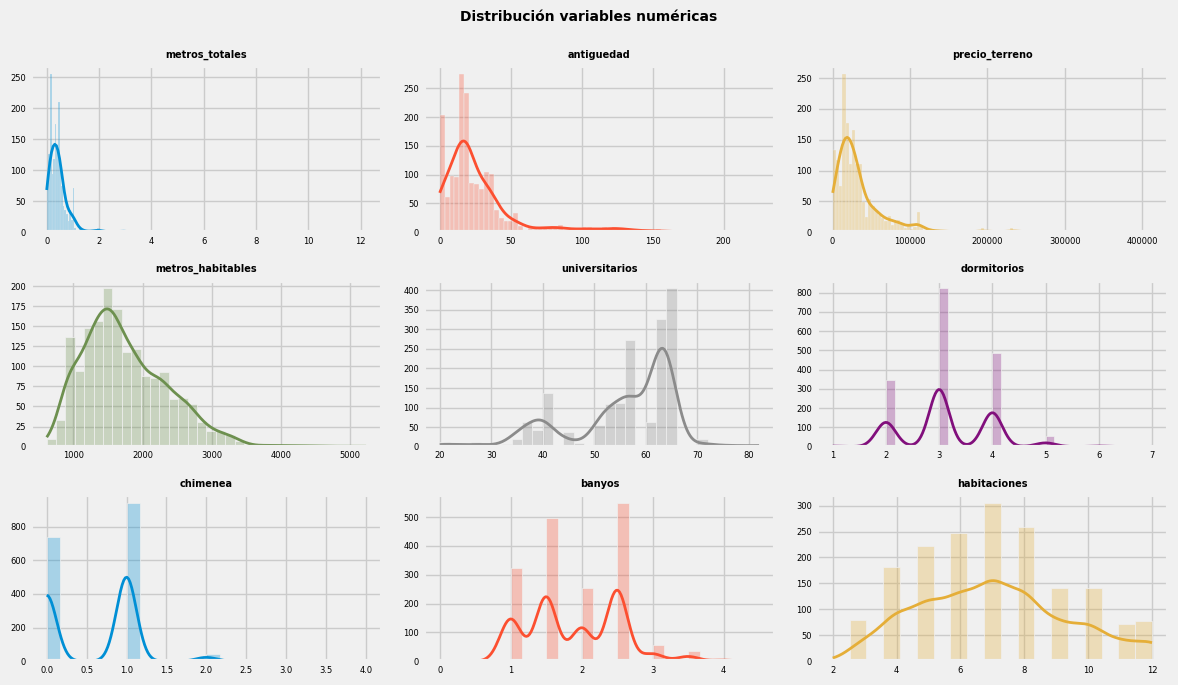

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Crear una figura con 3 filas y 3 columnas de subgráficos
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flat

# Seleccionar las columnas numéricas
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

# Eliminar la columna 'precio' de la lista de columnas numéricas
columnas_numeric = columnas_numeric.drop('precio')

# Crear los histogramas para cada variable numérica
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],# Asignar un color a cada gráfico
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")  # Título del gráfico
    axes[i].tick_params(labelsize = 6)  # Tamaño de las etiquetas de los ejes
    axes[i].set_xlabel("")  # Sin etiqueta en el eje X
    axes[i].set_ylabel("")  # Sin etiqueta en el eje Y
    
    
fig.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.subplots_adjust(top = 0.9)  # Ajustar el espacio superior para el título
 # Título general de la figura
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold") ;


# Valores Observados de la Variable `chimenea`

Este bloque de código se utiliza para obtener la frecuencia de los valores observados en la columna `chimenea`, después de convertirla a tipo `str` (cadena de texto). Es útil para examinar la distribución de los valores en una variable cualitativa, en este caso, relacionada con la presencia de chimenea en las casas.

## Conversión de la Columna `chimenea` a Tipo String

Primero, se convierte la columna `chimenea` a tipo de dato `str` para garantizar que los valores se manejen como cadenas de texto.


In [ ]:
# Valores observados de chimenea
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")
datos.chimenea.value_counts()

chimenea
1    942
0    740
2     42
4      2
3      2
Name: count, dtype: int64

# Análisis de Variables Cualitativas

Este bloque de código se utiliza para obtener un resumen estadístico de las variables cualitativas (de tipo `object`) en el conjunto de datos. En este contexto, las variables cualitativas son aquellas que contienen valores categóricos o texto.

El método `describe()` de `pandas` se utiliza para generar un resumen de las variables cualitativas (cuyo tipo de datos es `object`) del DataFrame.

In [ ]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


# Gráfico para Cada Variable Cualitativa

Este bloque de código genera gráficos de barras horizontales para cada variable cualitativa en el conjunto de datos. Cada gráfico muestra la frecuencia de los valores observados en las variables de tipo `object`. Esto es útil para visualizar la distribución de las categorías en cada variable cualitativa.

## Visualización de las Variables Cualitativas

Se crea una figura con subgráficos, donde cada subgráfico es un gráfico de barras horizontales que muestra la frecuencia de los valores en cada variable cualitativa.

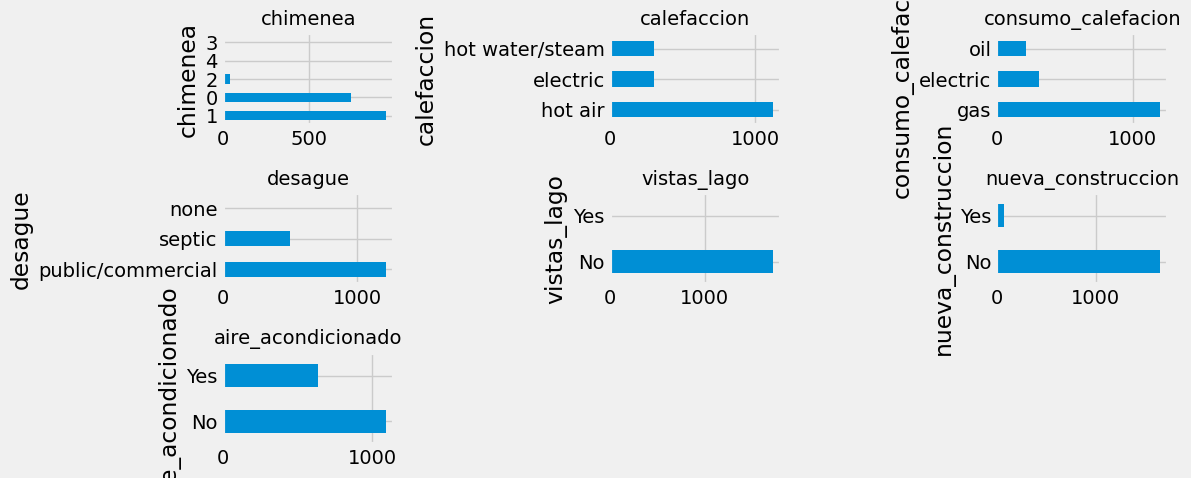

In [ ]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 5))  # Crear una figura con 3 filas y 3 columnas de subgráficos
axes = axes.flat  # Aplanar la matriz de ejes para iterar fácilmente
columnas_object = datos.select_dtypes(include=['object']).columns  # Seleccionar las columnas cualitativas

# Crear los gráficos de barras horizontales para cada variable cualitativa
for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])  # Crear el gráfico de barras horizontales
    axes[i].set_title(colum, fontsize = 14)  # Título del gráfico
    axes[i].set_xlabel("")  # Eliminar la etiqueta del eje X

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])  # Eliminar los gráficos vacíos

fig.tight_layout()  # Ajustar el diseño para evitar solapamientos


# Manejo de Clases con Pocas Observaciones en la Variable `chimenea`

En este bloque de código se aborda un posible problema en el cual algunos niveles de la variable `chimenea` tienen muy pocas observaciones, lo que puede generar problemas durante la validación cruzada o el bootstrapping, ya que algunas particiones podrían no contener ejemplos de ciertos niveles (lo que genera varianza cero). Para evitar estos problemas, los niveles con pocas observaciones (en este caso, los niveles `2`, `3` y `4`) se unifican en un nuevo nivel denominado `"2_mas"`.

## Reemplazo de Niveles en la Variable `chimenea`

El código siguiente realiza el reemplazo de los niveles `2`, `3` y `4` por el nuevo nivel `"2_mas"`. Esto ayuda a equilibrar la frecuencia de las clases y evitar posibles problemas durante la validación del modelo.

In [ ]:
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

 # Mantener los demás valores sin cambios
datos['chimenea'] = datos['chimenea'] \
                     .map(dic_replace) \
                     .fillna(datos['chimenea'])
                     
 # Contar las frecuencias de los valores después del reemplazo                     
datos.chimenea.value_counts().sort_index()

chimenea
0        740
1        942
2_mas     46
Name: count, dtype: int64

# División de Datos en Conjunto de Entrenamiento y Conjunto de Prueba

En este bloque de código se dividen los datos en dos conjuntos: uno para entrenamiento (80% de los datos) y otro para prueba (20% de los datos). Esto es fundamental para poder estimar el error del modelo al predecir nuevas observaciones que no han sido vistas durante el entrenamiento.

## División de los Datos

El código utiliza la función `train_test_split` de la librería `sklearn.model_selection` para dividir los datos en un conjunto de entrenamiento y otro de prueba.


In [ ]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Verificación de Similitud entre Conjuntos de Entrenamiento y Prueba

Una vez que se han dividido los datos en los conjuntos de entrenamiento y prueba, es importante verificar que ambos conjuntos sean similares en cuanto a sus estadísticas descriptivas. Esto asegura que la partición ha sido realizada correctamente y que ambos conjuntos contienen distribuciones similares de las características y las etiquetas.

## Verificación de la Partición

El código siguiente realiza una comparación de las estadísticas descriptivas de los conjuntos de entrenamiento y prueba, tanto para las variables numéricas como para las variables cualitativas (categóricas).


In [ ]:
print("Partición de entrenamiento")
print("-----------------------")
display(y_train.describe())# Estadísticas descriptivas de la variable objetivo en entrenamiento
display(X_train.describe())# Estadísticas descriptivas de las características en entrenamiento
display(X_train.describe(include = 'object'))  # Estadísticas descriptivas de las variables cualitativas en entrenamiento
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())# Estadísticas descriptivas de la variable objetivo en test
display(X_test.describe())# Estadísticas descriptivas de las características en test
display(X_test.describe(include = 'object'))# Estadísticas descriptivas de las variables cualitativas en test

Partición de entrenamiento
-----------------------


count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.501331,27.494211,34232.141823,1755.940666,55.439942,3.165702,1.902677,7.073082
std,0.671766,28.212721,35022.662319,621.262215,10.356656,0.825487,0.660053,2.315395
min,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,2.000000
25%,0.170000,13.000000,15100.000000,1302.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1650.000000,57.000000,3.000000,2.000000,7.000000
75%,0.540000,33.750000,39200.000000,2127.250000,63.000000,4.000000,2.500000,9.000000
max,8.970000,201.000000,412600.000000,4856.000000,82.000000,7.000000,4.500000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1382,1382,1382,1382,1382,1382,1382
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,741,915,972,970,1370,1321,863


 
Partición de test
-----------------------


count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.495751,29.601156,35855.491329,1751.121387,56.078035,3.109827,1.890173,6.916185
std,0.798240,32.884116,35035.761216,615.486848,10.239861,0.783575,0.652368,2.319776
min,0.010000,0.000000,300.000000,792.000000,20.000000,1.000000,1.000000,2.000000
25%,0.160000,13.000000,15100.000000,1296.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,26700.000000,1608.000000,57.000000,3.000000,2.000000,7.000000
75%,0.557500,34.000000,45950.000000,2181.000000,64.000000,4.000000,2.500000,8.000000
max,12.200000,225.000000,233000.000000,5228.000000,82.000000,6.000000,4.000000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,346,346,346,346,346,346,346
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,201,206,225,243,343,326,230


# Preprocesado de Datos para Redes Neuronales

En este bloque de código se lleva a cabo el preprocesamiento necesario para entrenar un modelo de red neuronal. Este preprocesamiento incluye dos pasos fundamentales:
1. **Estandarización** de las variables numéricas.
2. **Codificación One-Hot** de las variables categóricas.

El preprocesado garantiza que las variables estén en un formato adecuado para ser utilizadas en los modelos de redes neuronales.

## Identificación de Columnas por Tipo

Antes de aplicar las transformaciones, primero se identifican las columnas numéricas y categóricas para poder aplicar las transformaciones correspondientes.

- Explicación:
    - `numeric_cols`: Contiene los nombres de las columnas numéricas (de tipo float64 o int).
    - `cat_cols`: Contiene los nombres de las columnas categóricas (de tipo object o category).
Este paso es fundamental para asegurarse de que las transformaciones se apliquen solo a las columnas correctas.

## Transformación para las Variables Numéricas
Las variables numéricas se estandarizan utilizando el `StandardScaler` de `sklearn`, que centra los datos en cero y los escala para que tengan una desviación estándar de 1.

## Transformación para las Variables Categóricas
Las variables categóricas se transforman mediante la codificación One-Hot Encoding utilizando el `OneHotEncoder` de `sklearn`. Esta transformación convierte cada categoría en una columna binaria que representa la presencia o ausencia de una categoría.

El parámetro `handle_unknown='ignore'` asegura que, si durante la predicción aparecen categorías desconocidas (no vistas en el conjunto de entrenamiento), no se genere un error, sino que se maneje adecuadamente.

## Columna Resto (No Transformada)
Se utiliza el parámetro `remainder='passthrough'` para que las columnas que no necesitan ser transformadas (por ejemplo, variables que no son numéricas ni categóricas) pasen directamente al conjunto de datos sin cambios.
- Explicación del Preprocesador:
    - `ColumnTransformer`: Es una herramienta de sklearn que permite aplicar transformaciones específicas a diferentes subconjuntos de las columnas.
    - transformers:
        - `('numeric', numeric_transformer, numeric_cols)`: Aplica el numeric_transformer (que contiene el StandardScaler) a las columnas numéricas.
        - `('cat', categorical_transformer, cat_cols)`: Aplica el categorical_transformer (que contiene el OneHotEncoder) a las columnas categóricas.
    - `remainder='passthrough'`: Las columnas que no son numéricas ni categóricas serán mantenidas tal cual (sin ninguna transformación).


In [ ]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Configuración y Visualización del Preprocesador

En este bloque de código, se configura la visualización de diagramas para los objetos de `sklearn` y se muestra un diagrama del `ColumnTransformer` que se ha creado anteriormente. Este diagrama permite comprender cómo se transforman los datos a través de las distintas etapas del preprocesamiento.


In [ ]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

Cuando usas `set_config(display='text')` en `sklearn`, estás configurando el entorno para que los objetos, como pipelines y transformadores, se muestren en un formato textual en lugar de gráfico. Esto es útil si prefieres obtener una descripción más detallada y textual de los objetos que has creado en lugar de visualizar diagramas.

In [ ]:
set_config(display='text')

# Aplicación de Transformaciones de Preprocesado

En este bloque de código, se aplican las transformaciones de preprocesado a los conjuntos de datos de entrenamiento y prueba utilizando el objeto `preprocessor` previamente definido. Este objeto es un `ColumnTransformer` que incluye transformaciones para las variables numéricas y categóricas.

In [ ]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# Conversión del Output en DataFrame y Asignación de Nombres de Columnas

En este bloque de código, se transforma el resultado del preprocesamiento aplicado a los datos de entrenamiento en un DataFrame de pandas y se añaden los nombres de las columnas correspondientes. Esto es útil para garantizar que el resultado de las transformaciones sea más comprensible y fácil de manipular.

In [ ]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names_out(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2_mas               1382 non-null   float64
 11  calefaccion_electric         1382 non-null   float64
 12  calefaccion_hot air          1382 non-null   float64
 13  calefaccion_hot wa

# Documentación del Pipeline de Preprocesamiento y Modelado

El uso de pipelines en **scikit-learn** es una práctica recomendada cuando se desea automatizar el proceso de preprocesado y modelado, asegurando que todo el flujo de trabajo esté encapsulado en una sola estructura. Esto no solo mejora la eficiencia, sino que también facilita la repetibilidad y la validación del modelo. En esta sección se describe cómo construir un pipeline que combine tanto las transformaciones necesarias en los datos como el entrenamiento de un modelo.

## Identificación de Columnas Numéricas y Categóricas

Antes de realizar las transformaciones, es necesario identificar cuáles son las columnas numéricas y categóricas del conjunto de datos. Esto se logra utilizando el método `select_dtypes` de Pandas.

- `numeric_cols`: Lista con los nombres de las columnas numéricas (de tipo float64 e int).
- `cat_cols`: Lista con los nombres de las columnas categóricas (de tipo object o category).

In [ ]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

### Transformaciones para Variables Numéricas y Categóricas
Para las variables numéricas y categóricas, definimos transformaciones específicas:

- **Variables Numéricas**: Se aplica `StandardScaler`, que normaliza las variables para que tengan media 0 y desviación estándar 1.
    -  `numeric_transformer`: Define el pipeline de transformación para las variables numéricas. En este caso, se utiliza StandardScaler para estandarizar los datos numéricos.
- **Variables Categóricas**: Se aplica OneHotEncoder para convertir las variables categóricas en variables binarias (dummy variables).
    - `categorical_transformer`: Define el pipeline para las variables categóricas. OneHotEncoder(handle_unknown='ignore') asegura que se ignore cualquier categoría desconocida durante el ajuste o la transformación.

In [ ]:
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

### Combinación de las Transformaciones con un ColumnTransformer
Luego, se usa ColumnTransformer para aplicar las transformaciones específicas a las columnas correctas:

`preprocessor`: Se define un `ColumnTransformer` que aplica las transformaciones previas a las columnas numéricas y categóricas de manera independiente. La opción `remainder='passthrough'` asegura que las columnas que no estén especificadas en los transformadores (en caso de existir) se dejen sin cambios.

In [ ]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

### Creación del Pipeline de Preprocesado + Modelado
Una vez que las transformaciones están definidas, se combinan con el modelo en un único `pipeline`. En este caso, se utiliza el `MLPRegressor` de `scikit-learn` para crear un modelo de regresión basado en una red neuronal multi-capa.

- `pipe`: Un `Pipeline` que incluye dos pasos:
    - **Preprocesamiento**: Aplica las transformaciones definidas en preprocessor.
    - **Modelo**: Entrena un `MLPRegressor` (perceptrón multicapa), especificando el solver `lbfgs` y un número máximo de iteraciones de 1000.

In [ ]:
pipe = Pipeline([
                 ('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver='lbfgs', max_iter=1000))
               ])

### Espacio de Búsqueda de Hiperparámetros
A continuación, se define el espacio de búsqueda de los hiperparámetros para el modelo. Se utilizará una búsqueda aleatoria para explorar varias combinaciones de hiperparámetros.

- `param_distributions`: Define los rangos de búsqueda de los hiperparámetros para el   `MLPRegressor`:
    - `hidden_layer_sizes`: Número de neuronas en las capas ocultas.
    - `alpha`: Término de regularización (coeficiente de penalización).
    - `learning_rate_init`: Tasa de aprendizaje inicial.

In [ ]:
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

### Búsqueda por Validación Cruzada con RandomizedSearchCV
Para optimizar los hiperparámetros del modelo, se utiliza `RandomizedSearchCV`, que realiza una búsqueda aleatoria sobre el espacio definido anteriormente.

- `grid`: Un objeto RandomizedSearchCV que:
    - Realiza una búsqueda aleatoria `(n_iter=50)` sobre el espacio de hiperparámetros definido.
    - Usa validación cruzada con 5 pliegues `(cv=5)`.
    - Evalúa el rendimiento usando el error cuadrático medio negativo `(scoring='neg_mean_squared_error').`
    - Utiliza todos los núcleos disponibles `(n_jobs)`.

In [ ]:
# Búsqueda por validación cruzada
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

### Entrenamiento del Modelo
El modelo se ajusta al conjunto de entrenamiento utilizando grid.fit:
- `grid.fit()`: Ajusta el modelo al conjunto de entrenamiento `X_train` y las etiquetas `y_train`, explorando automáticamente las combinaciones de hiperparámetros.

In [ ]:
# Entrenamiento del Modelo
grid.fit(X = X_train, y = y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['metros_totales',
                                                                                'antiguedad',
                                                                                'precio_terreno',
                                                                                'metros_habitables',
                                                                                'universitarios',
                     

### Resultados del Grid Search
Una vez que la búsqueda de hiperparámetros ha terminado, se pueden obtener los resultados y mostrar las mejores combinaciones de parámetros

- `resultados`: Se crea un DataFrame con los resultados de la búsqueda, donde se muestran los hiperparámetros probados y el rendimiento de cada configuración.
- `filter(regex='(param.*|mean_t|std_t)')`: Filtra las columnas de los resultados para mostrar solo los parámetros del modelo y las métricas de evaluación.
- `sort_values('mean_test_score', ascending=False)`: Ordena los resultados según la métrica de evaluación (en este caso, el error cuadrático medio negativo), de mayor a menor.

In [ ]:
# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
6,0.001,10,0.100000,-3.336748e+09,7.680632e+08,-2.584633e+09,2.139269e+08
15,0.001,10,0.001000,-3.350727e+09,8.473042e+08,-2.758230e+09,2.346627e+08
25,0.010,10,0.001000,-3.366075e+09,6.476673e+08,-2.643499e+09,2.722092e+08
32,0.010,10,0.004642,-3.396672e+09,6.656112e+08,-2.676907e+09,2.781085e+08
5,0.001,"(10, 10)",215.443469,-3.423772e+09,9.382098e+08,-2.576671e+09,2.776866e+08
20,0.001,10,0.021544,-3.467844e+09,6.772022e+08,-2.507903e+09,2.799912e+08
16,0.010,"(10, 10)",0.001000,-3.482626e+09,5.546379e+08,-2.392360e+09,1.226226e+08
30,0.010,10,10.000000,-3.489812e+09,6.184493e+08,-2.431881e+09,9.397564e+07
40,0.010,"(10, 10)",1000.000000,-3.516419e+09,9.044944e+08,-2.447980e+09,3.143287e+08
28,0.010,"(10, 10)",0.464159,-3.540424e+09,8.083112e+08,-2.338255e+09,2.514919e+08


# Cálculo del Error de Test

El **error de test** es una métrica crucial para evaluar el rendimiento final de un modelo de machine learning. Aunque las técnicas de validación como **K-fold** o **Leave-One-Out Cross-Validation** ofrecen buenas estimaciones de cómo se comportará el modelo en datos no vistos, la **mejor forma de evaluar el modelo final** es mediante la predicción sobre un conjunto de test. Este conjunto de test debe ser un subconjunto de datos que no haya sido utilizado en el proceso de entrenamiento ni en la optimización de hiperparámetros.

El **error de test** nos da una estimación realista del rendimiento del modelo en nuevas observaciones, lo que nos permite tener una medida del "desempeño en producción" de nuestro modelo.

El siguiente código muestra cómo calcular el **Error de Test** utilizando la métrica **Root Mean Squared Error (RMSE)**, que es una de las métricas más comunes para evaluar modelos de regresión.


In [ ]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  67872.06694687359


# Conclusión

En este análisis, hemos llevado a cabo una búsqueda de hiperparámetros utilizando **RandomizedSearchCV**, un proceso que nos permite encontrar la mejor configuración de parámetros para el modelo. El modelo final que se obtiene de esta búsqueda es el que ha demostrado tener el mejor rendimiento según las métricas de validación cruzada, como el error cuadrático medio (RMSE) o cualquier otra métrica definida durante el proceso de optimización.

## Obtener la Combinación Óptima de Hiperparámetros

Para acceder a la combinación de hiperparámetros que ofrece el mejor rendimiento, utilizamos el siguiente código:

In [ ]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': np.float64(0.1),
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}